In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [60]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

In [62]:
sns.set(style='whitegrid')
plt.rcParams['figure.figsize'] = (10, 6)

In [64]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [66]:
train.shape

(576, 12)

In [68]:
test.shape

(120, 12)

In [70]:
train.head()

,profile pic,nums/length username,fullname words,nums/length fullname,name==username,description length,external URL,private,#posts,#followers,#follows,fake
0,1,0.27,0,0.0,0,53,0,0,32,1000,955,0
1,1,0.00,2,0.0,0,44,0,0,286,2740,533,0
2,1,0.10,2,0.0,0,0,0,1,13,159,98,0
3,1,0.00,1,0.0,0,82,0,0,679,414,651,0
4,1,0.00,2,0.0,0,0,0,1,6,151,126,0


In [72]:
test.head()

,profile pic,nums/length username,fullname words,nums/length fullname,name==username,description length,external URL,private,#posts,#followers,#follows,fake
0,1,0.33,1,0.33,1,30,0,1,35,488,604,0
1,1,0.00,5,0.00,0,64,0,1,3,35,6,0
2,1,0.00,2,0.00,0,82,0,1,319,328,668,0
3,1,0.00,1,0.00,0,143,0,1,273,14890,7369,0
4,1,0.50,1,0.00,0,76,0,1,6,225,356,0


In [74]:
train.isnull().sum()

profile pic             0
nums/length username    0
fullname words          0
nums/length fullname    0
name==username          0
description length      0
external URL            0
private                 0
#posts                  0
#followers              0
#follows                0
fake                    0
dtype: int64

In [76]:
train.describe()

,profile pic,nums/length username,fullname words,nums/length fullname,name==username,description length,external URL,private,#posts,#followers,#follows,fake
count,576.000000,576.000000,576.000000,576.000000,576.000000,576.000000,576.000000,576.000000,576.000000,5.760000e+02,576.000000,576.000000
mean,0.701389,0.163837,1.460069,0.036094,0.034722,22.623264,0.116319,0.381944,107.489583,8.530724e+04,508.381944,0.500000
std,0.458047,0.214096,1.052601,0.125121,0.183234,37.702987,0.320886,0.486285,402.034431,9.101485e+05,917.981239,0.500435
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000
25%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.900000e+01,57.500000,0.000000
50%,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,1.505000e+02,229.500000,0.500000
75%,1.000000,0.310000,2.000000,0.000000,0.000000,34.000000,0.000000,1.000000,81.500000,7.160000e+02,589.500000,1.000000
max,1.000000,0.920000,12.000000,1.000000,1.000000,150.000000,1.000000,1.000000,7389.000000,1.533854e+07,7500.000000,1.000000


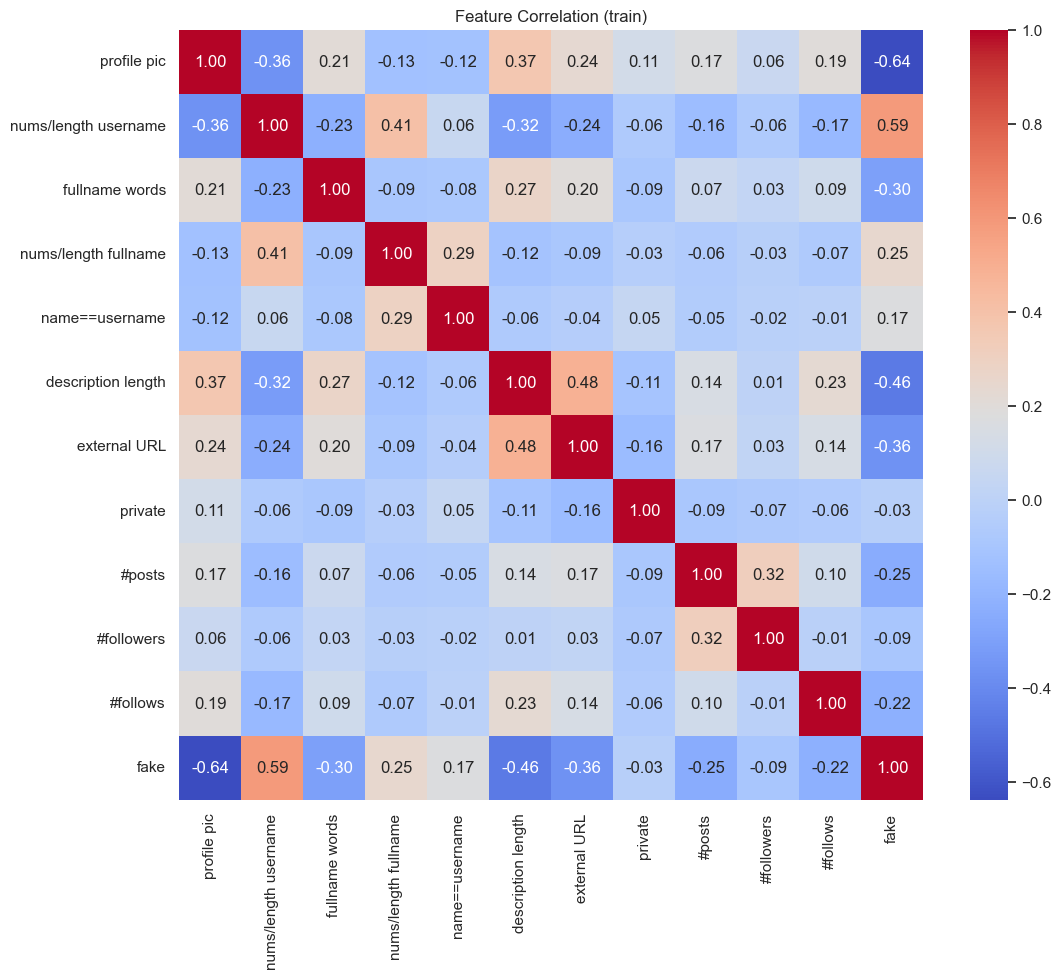

In [78]:
plt.figure(figsize = (12,10))
sns.heatmap(train.corr(), annot = True, fmt = ".2f", cmap = 'coolwarm')
plt.title("Feature Correlation (train)")
plt.show()

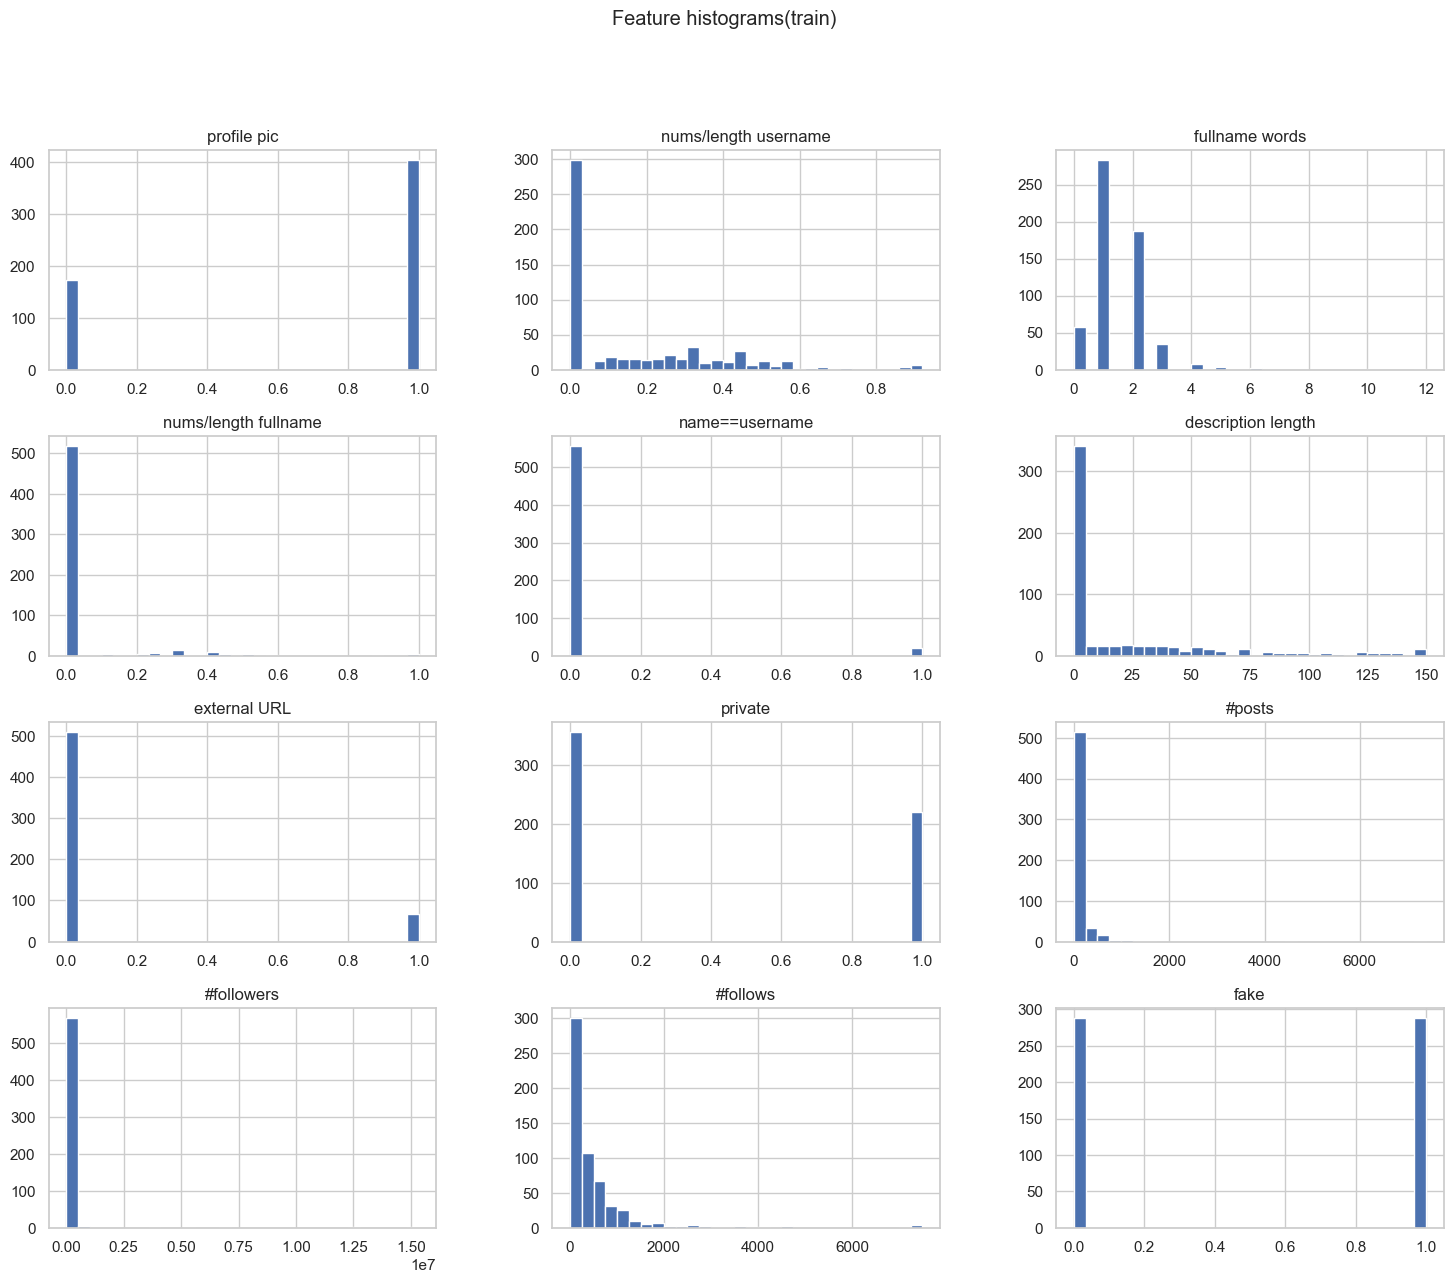

In [79]:
train.hist(bins = 30, figsize=(18, 14))
plt.suptitle("Feature histograms(train)")
plt.show()

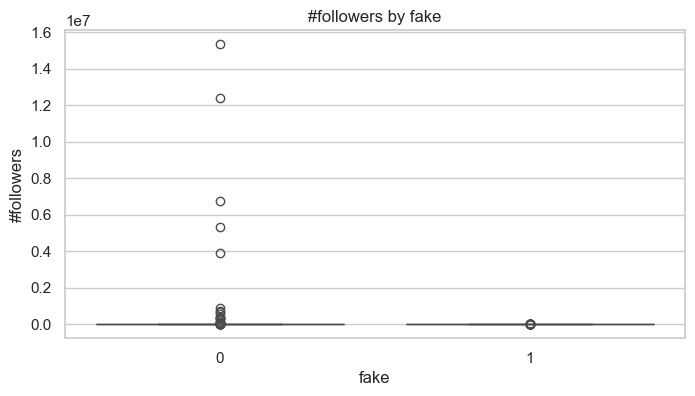

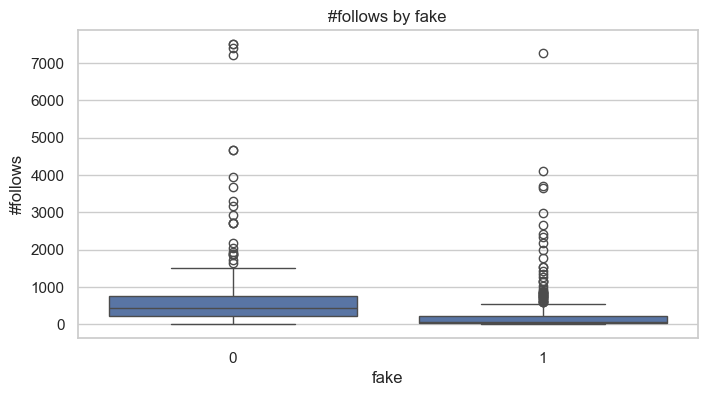

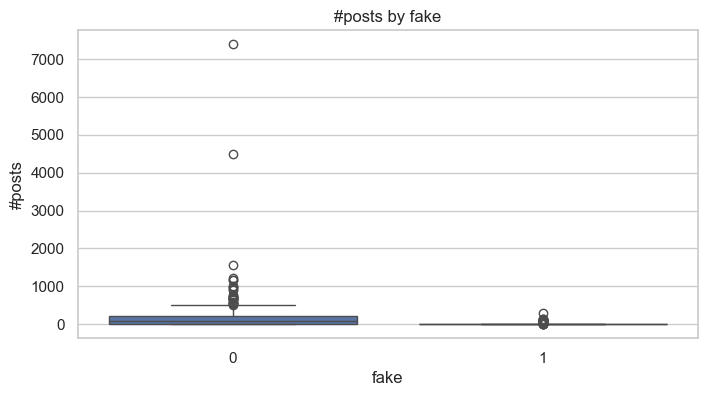

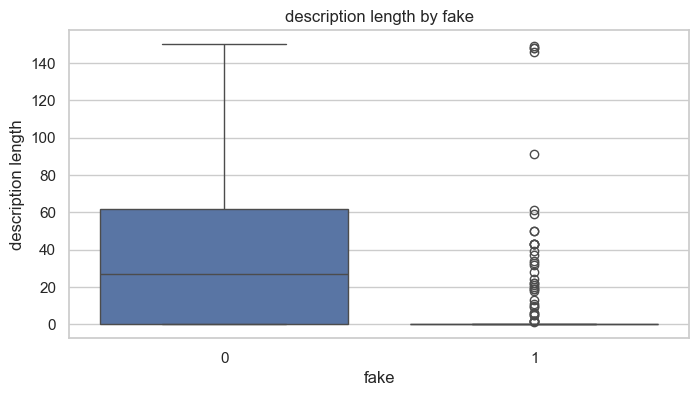

In [81]:
for col in ['#followers','#follows', '#posts', 'description length']:
    if col in train.columns:
        plt.figure(figsize = (8, 4))
        sns.boxplot(x = 'fake', y = col, data = train)
        plt.title(f"{col} by fake")
        plt.show()

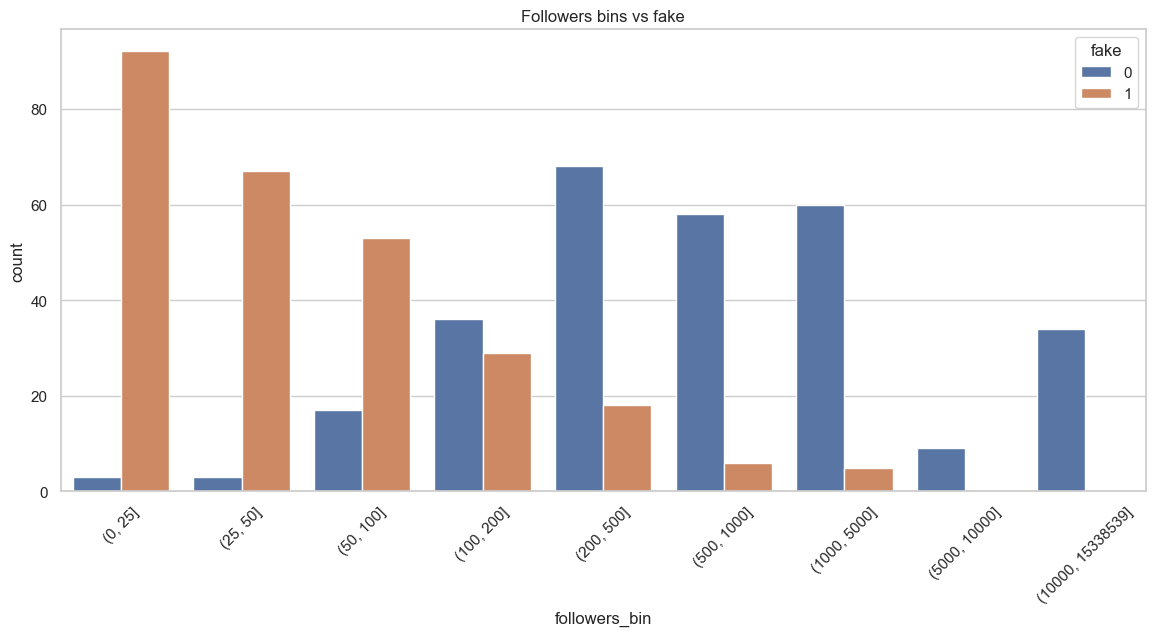

In [82]:
if '#followers' in train.columns:
    bins = [0, 25, 50, 100, 200, 500, 1000, 5000, 10000, train['#followers'].max()+1]
    train['followers_bin'] = pd.cut(train['#followers'], bins=bins)
    plt.figure(figsize = (14, 6))
    sns.countplot(x = 'followers_bin', hue = 'fake', data = train)
    plt.xticks(rotation = 45)
    plt.title("Followers bins vs fake")
    plt.show()

In [83]:
df = train.copy()

In [84]:
non_numeric = df.select_dtypes(include = ['object']).columns.tolist()
print("Non-numeric columns:", non_numeric)

Non-numeric columns: []


In [85]:
if non_numeric:
    for c in non_numeric:
        df[c] = df[c].astype('category').cat.codes

In [87]:
drop_cols = []
if 'followers_bin' in df.columns:
    drop_cols.append('followers_bin')
x = df.drop(columns = ['fake'] + drop_cols)
y = df['fake']

In [88]:
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size = 0.20, stratify = y, random_state = 42)
print("Shapes:", x_train.shape, x_val.shape, y_train.shape, y_val.shape)

Shapes: (460, 11) (116, 11) (460,) (116,)


In [96]:
scaler = StandardScaler()
numeric_cols = x_train.select_dtypes(include = [np.number]).columns.tolist()
x_train_scaled = x_train.copy()
x_val_scaled = x_val.copy()
x_test_scaled = test.copy()

In [98]:
x_train_scaled[numeric_cols] = scaler.fit_transform(x_train[numeric_cols])
x_val_scaled[numeric_cols] = scaler.fit_transform(x_val[numeric_cols])
x_test = test.copy()
if 'fake' in x_test.columns:
    x_test = x_test.drop(columns = ['fake'])

Decision Tree Validation accuracy: 0.6379310344827587
              precision    recall  f1-score   support

           0       0.94      0.29      0.45        58
           1       0.58      0.98      0.73        58

    accuracy                           0.64       116
   macro avg       0.76      0.64      0.59       116
weighted avg       0.76      0.64      0.59       116



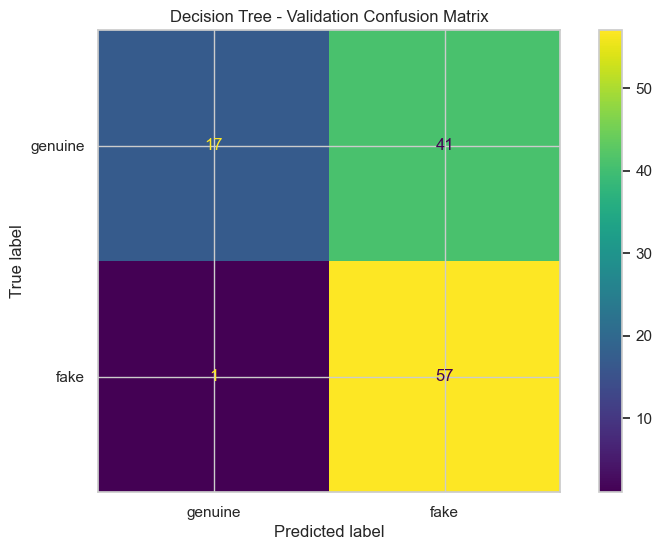

In [103]:
missing_in_test = set(x_train.columns) - set(x_test.columns)
if missing_in_test:
    print("Warning: columns missing in test:", missing_in_test)
    for c in missing_in_test:
        x_test[c] = 0
x_test = x_test[x_train.columns]
x_test_scaled = x_test.copy()
x_test_scaled[numeric_cols] = scaler.transform(x_test[numeric_cols])

dt = DecisionTreeClassifier(random_state = 42)
dt.fit(x_train_scaled, y_train)

y_val_pred_dt = dt.predict(x_val_scaled)
print("Decision Tree Validation accuracy:", accuracy_score(y_val, y_val_pred_dt))
print(classification_report(y_val, y_val_pred_dt))
cm = confusion_matrix(y_val, y_val_pred_dt)
ConfusionMatrixDisplay(cm, display_labels = ['genuine', 'fake']).plot()
plt.title("Decision Tree - Validation Confusion Matrix")
plt.show()

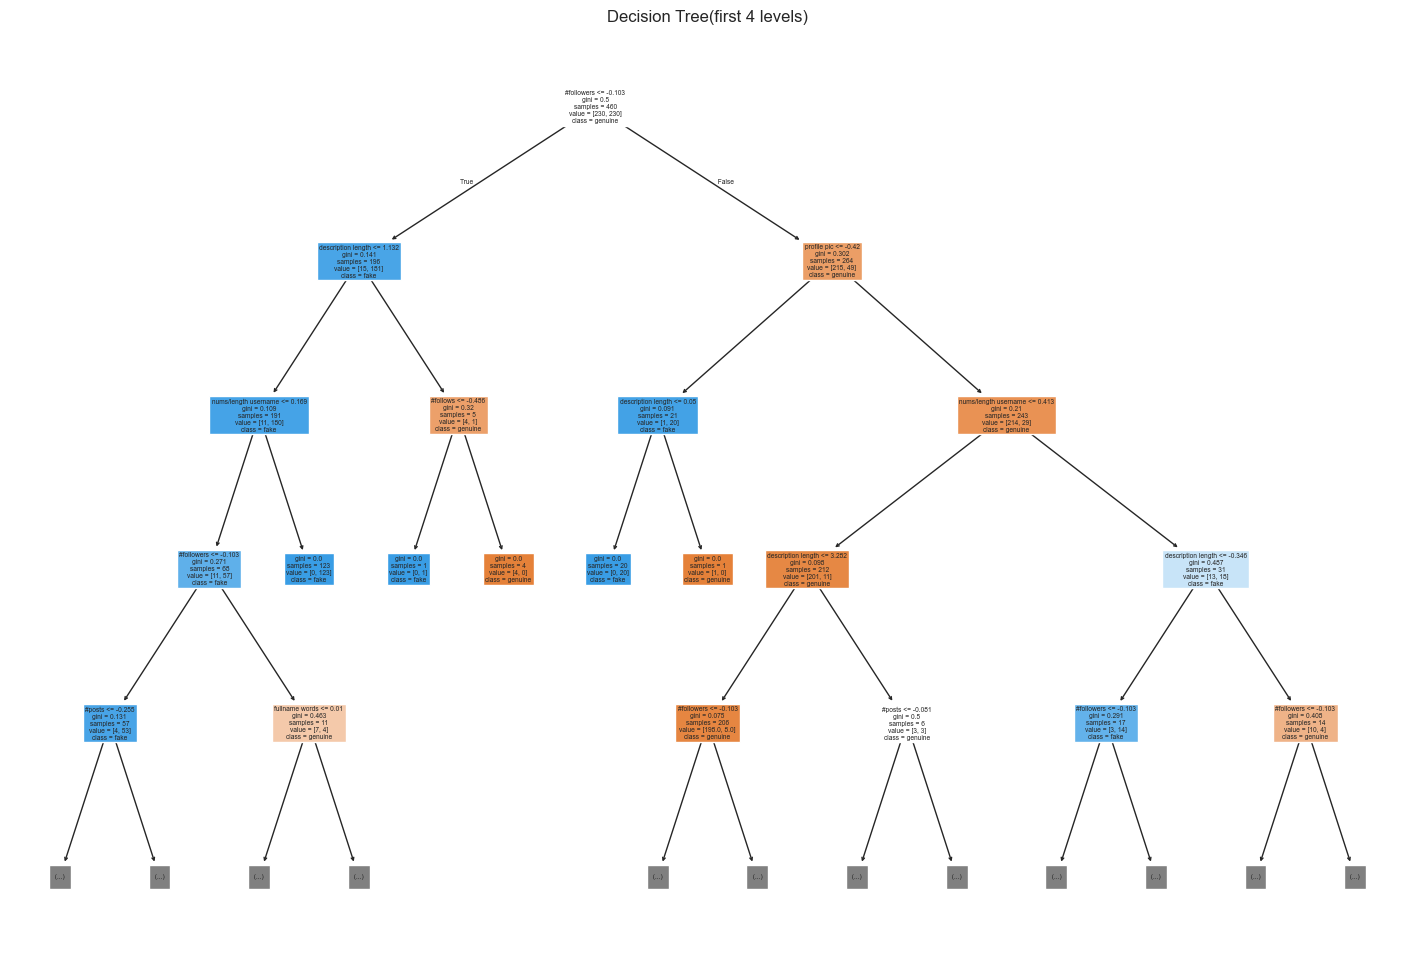

In [109]:
plt.figure(figsize = (18,12))
plot_tree(dt, feature_names = x_train.columns, class_names = ['genuine', 'fake'], filled = True, max_depth = 4)
plt.title("Decision Tree(first 4 levels)")
plt.show()

Top Decision Tree features:
 #followers              0.602930
profile pic             0.116642
nums/length username    0.090292
description length      0.066074
#follows                0.060716
#posts                  0.047384
fullname words          0.010785
private                 0.005178
nums/length fullname    0.000000
name==username          0.000000
dtype: float64


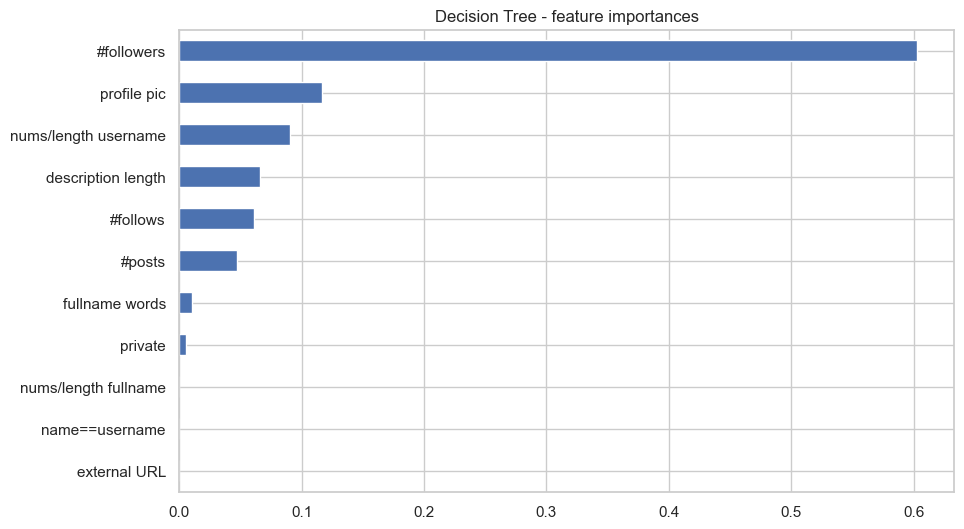

In [115]:
fi_dt = pd.Series(dt.feature_importances_, index = x_train.columns).sort_values(ascending = False)
print("Top Decision Tree features:\n", fi_dt.head(10))
fi_dt.head(15).plot(kind = 'barh')
plt.title("Decision Tree - feature importances")
plt.gca().invert_yaxis()
plt.show()

Random Forest validation accuracy: 0.603448275862069
              precision    recall  f1-score   support

           0       1.00      0.21      0.34        58
           1       0.56      1.00      0.72        58

    accuracy                           0.60       116
   macro avg       0.78      0.60      0.53       116
weighted avg       0.78      0.60      0.53       116



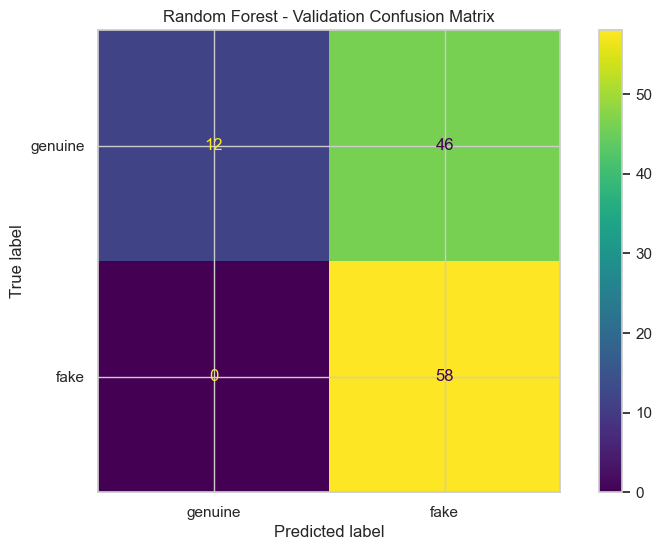

In [123]:
rf = RandomForestClassifier(n_estimators = 200, random_state = 42, n_jobs = -1)
rf.fit(x_train_scaled, y_train)

y_val_pred_rf = rf.predict(x_val_scaled)
print("Random Forest validation accuracy:", accuracy_score(y_val, y_val_pred_rf))
print(classification_report(y_val, y_val_pred_rf))
cm_rf = confusion_matrix(y_val, y_val_pred_rf)
ConfusionMatrixDisplay(cm_rf, display_labels = ['genuine', 'fake']).plot()
plt.title("Random Forest - Validation Confusion Matrix")
plt.show()


Top Random Forest features:
 #followers              0.299800
#posts                  0.240857
nums/length username    0.121404
profile pic             0.091938
description length      0.086823
#follows                0.084767
fullname words          0.045824
private                 0.010721
nums/length fullname    0.008120
external URL            0.007458
name==username          0.002288
dtype: float64


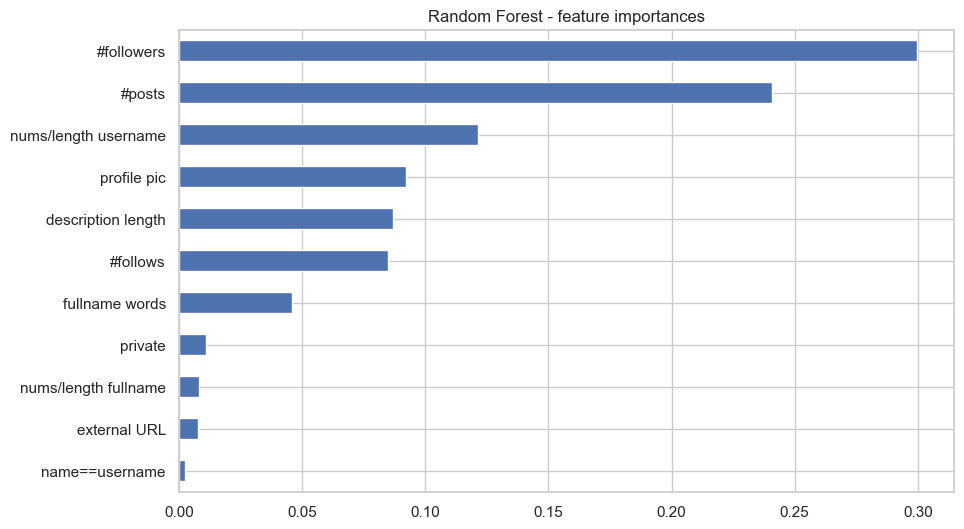

In [127]:
fi_rf = pd.Series(rf.feature_importances_, index = x_train.columns).sort_values(ascending = False)
print("Top Random Forest features:\n", fi_rf.head(15))
fi_rf.head(15).plot(kind = 'barh')
plt.title("Random Forest - feature importances")
plt.gca().invert_yaxis()
plt.show()

Test accuracy: 0.6166666666666667
              precision    recall  f1-score   support

           0       1.00      0.23      0.38        60
           1       0.57      1.00      0.72        60

    accuracy                           0.62       120
   macro avg       0.78      0.62      0.55       120
weighted avg       0.78      0.62      0.55       120



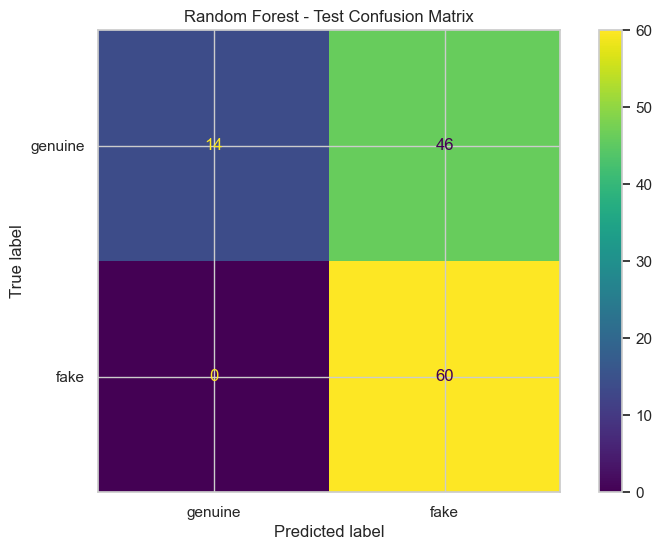

In [133]:
if 'fake' in test.columns:
    y_test_true = test['fake']
    x_test_for_pred = x_test_scaled
    y_test_pred = rf.predict(x_test_for_pred)
    print("Test accuracy:", accuracy_score(y_test_true, y_test_pred))
    print(classification_report(y_test_true, y_test_pred))
    cm_test = confusion_matrix(y_test_true, y_test_pred)
    ConfusionMatrixDisplay(cm_test, display_labels = ['genuine', 'fake']).plot()
    plt.title("Random Forest - Test Confusion Matrix")
    plt.show()
else:
    print("No ground truth 'fake' in test.csv - will generate predictions file for submission.")
    

In [141]:
x_test_for_pred = x_test_scaled
test_pred = rf.predict(x_test_for_pred)

out = test.copy()
out['predicted_fake'] = test_pred
out_path = 'test_predictions.csv'
out.to_csv(out_path, index=False)
print("Saved test predictions to:", out_path)

# %% 11. Final notes:
print("\nDone. Summary:")
print("- Decision Tree val acc:", round(accuracy_score(y_val, y_val_pred_dt),4))
print("- Random Forest val acc:", round(accuracy_score(y_val, y_val_pred_rf),4))
print("Top RF features:\n", fi_rf.head(10))

Saved test predictions to: test_predictions.csv

Done. Summary:
- Decision Tree val acc: 0.6379
- Random Forest val acc: 0.6034
Top RF features:
 #followers              0.299800
#posts                  0.240857
nums/length username    0.121404
profile pic             0.091938
description length      0.086823
#follows                0.084767
fullname words          0.045824
private                 0.010721
nums/length fullname    0.008120
external URL            0.007458
dtype: float64
